###**Karim Naous**
###**CMSC 395**
###**Dr. Joon Suk Park**
###**5/2/2020**



###**Project**
###Binary Classification: Income greater than US $50K?

###Task: Using the [Census Income Dataset](http://mlr.cs.umass.edu/ml/datasets/Census+Income), build a classifier to predict whether a person makes greater than or less than US $50K.

#####**Notes**
#####This is a complete project completed independently as part of a class assignment. I selected this task. 
#####After viewing, you can also review the related report: [link](https://drive.google.com/file/d/1WFlK_wQ5Vbx9Jeq3kZK52Cu_FK-EW7Vb/view?usp=sharing)



In [ ]:
# Importing neccessary libraries

import numpy 
import pandas as pd

import io
import seaborn as sns

from matplotlib import pyplot as plt
from collections import Counter
from pandas import read_csv
from pandas.api.types import CategoricalDtype

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import Data

In [ ]:
# Select and upload both files in the included 'upload' folder
from google.colab import files
uploaded = files.upload()


Saving adult.data.csv to adult.data.csv
Saving adult.test.csv to adult.test.csv


Read Data

In [ ]:

train_data = read_csv(io.BytesIO(uploaded['adult.data.csv']), header=None, na_values=' ?') # XYtrain
test_data = read_csv(io.BytesIO(uploaded['adult.test.csv']), header=None, na_values=' ?') # XYTest

# Add column labels

train_data.columns = ["Age", "Workclass", "Final Weight", "Education", 
    "Education Number of Year", "Marital-status", "Occupation", "Relationship", 
    "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week",
    "Native-country", "Class"]

test_data.columns = ["Age", "Workclass", "Final Weight", "Education", 
    "Education Number of Year", "Marital-status", "Occupation", "Relationship", 
    "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week",
    "Native-country", "Class"]
  

####**Features in this data-set are labelled. There are 14:**
#####Age: Continuous
#####Workclass: Government or private or self-employed
#####Final Weight: Weight of instance in sample
#####Education: K-12 to college 
#####Education Number of Years: continuous, same as education but numerial
#####Marital-status: Married, Never-Married, Divorced, etc.
#####Occupation: type of work / industry
#####Relationship: relation to a family (ex. husband, wife, child)
#####Race: White, Black, Asian, etc.
#####Sex: Male or Female
#####Capital-gain: Gain on invesments in past year
#####Capital-loss: Loss on invesments in past year
#####Hours-per-week: Number of hours worked per week
#####Native-country: Country of origin (to the U.S.)

# Data Preparation
Since we have a lot of data points, we can drop entries with missing values

In [ ]:

# Drop data with missing data-points
train_data = train_data.dropna()
test_data = test_data.dropna()


Now, we want to analyze the class distribution between the train and test data-sets.

In [ ]:
# summarize the class distribution

target = train_data.values[:,-1]
counter = Counter(target)
print("Train data-set:")
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))
 
print()

print("Test data-set:")
target = test_data.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Train data-set:
Class= <=50K, Count=22654, Percentage=75.108%
Class= >50K, Count=7508, Percentage=24.892%

Test data-set:
Class= <=50K, Count=11360, Percentage=75.432%
Class= >50K, Count=3700, Percentage=24.568%


**Training data:**
##### Remaining data = 30,162
#####Class distribution: 
#####<=50K: 75.108% 
##### >50K: 24.892%

**Test data:**
##### Remaining data = 16,281
#####Class distribution: 
#####<=50K: 76.377%
##### >50K: 23.623%

##### We can see a similar class distribution between the train and test data. There is slightly more <=50K classifications in the test dataset, but it is very mild (76.377% vs 75.108%). 




##### Our train:test ratio of 65%:35% which is good. The class distribution is similar across each which is important.

In [ ]:
# Encode Class to binary 0/1 in both train and test data-sets
train_data["Class"] = train_data["Class"].astype('category')
train_data["Class"] = train_data["Class"].cat.codes

test_data["Class"] = test_data["Class"].astype('category')
test_data["Class"] = test_data["Class"].cat.codes

#Data Exploration

First we analyze numerical attributes.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48faa1b5f8>,
      dtype=object)

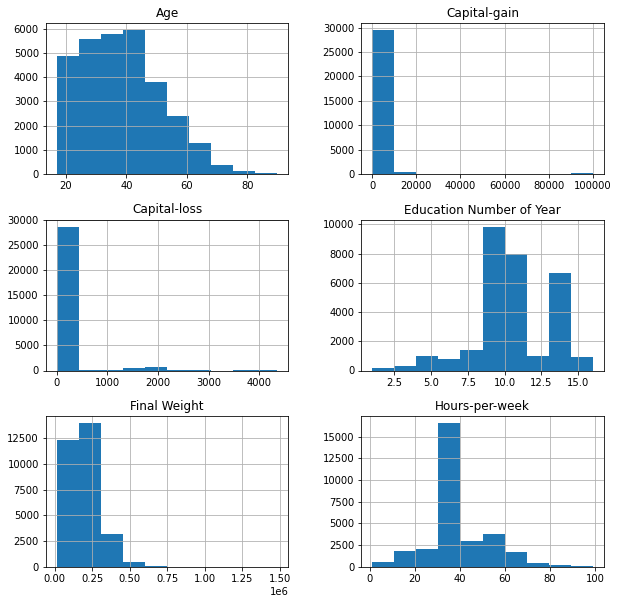

In [ ]:
num_attributes = train_data.select_dtypes(include=['int'])
num_attributes.hist(figsize=(10,10))

We can see that our data is evenly distributed for feature, which should help with model accuracy. We notice our data is on different scales, so we must scale it before fitting our model.

Now we analyze categorical attributes.

In [ ]:
# Select categorical attributes
cat_attributes = train_data.select_dtypes(include=['object'])
_Class = train_data["Class"]
cat_attributes['Class'] = _Class

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Class frequency with respect to Workclass


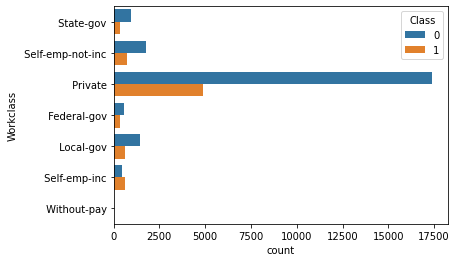

In [ ]:
print("Class frequency with respect to Workclass")
sns.countplot(y='Workclass', hue='Class', data = cat_attributes)

Class frequency with respect to Education


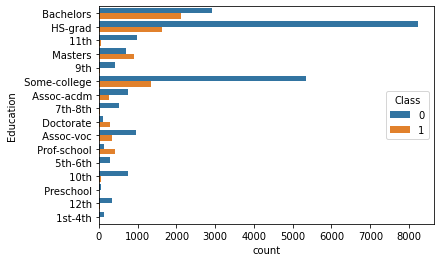

In [ ]:
print("Class frequency with respect to Education")
sns.countplot(y='Education', hue='Class', data = cat_attributes)

Class frequency with respect to Marital-status


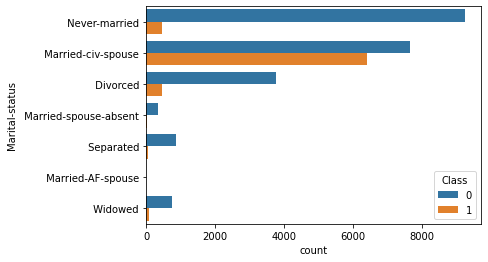

In [ ]:
print("Class frequency with respect to Marital-status")
sns.countplot(y='Marital-status', hue='Class', data = cat_attributes)

Class frequency with respect to Occupation


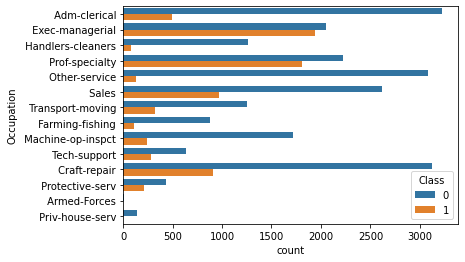

In [ ]:
print("Class frequency with respect to Occupation")
sns.countplot(y='Occupation', hue='Class', data = cat_attributes)

Class frequency with respect to Relationship


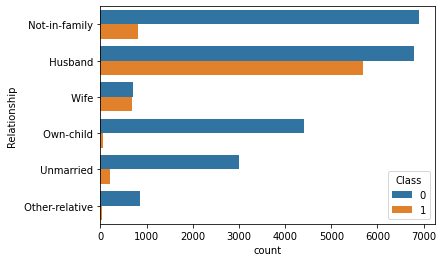

In [ ]:
print("Class frequency with respect to Relationship")
sns.countplot(y='Relationship', hue='Class', data = cat_attributes)

Class frequency with respect to Race


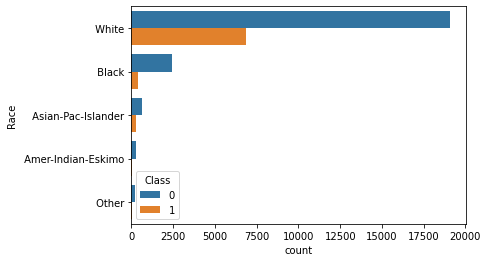

In [ ]:
print("Class frequency with respect to Race")
sns.countplot(y='Race', hue='Class', data = cat_attributes)

Class frequency with respect to Sex


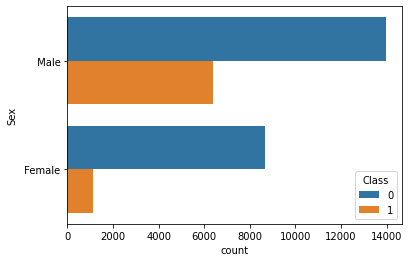

In [ ]:
print("Class frequency with respect to Sex")
sns.countplot(y='Sex', hue='Class', data = cat_attributes)

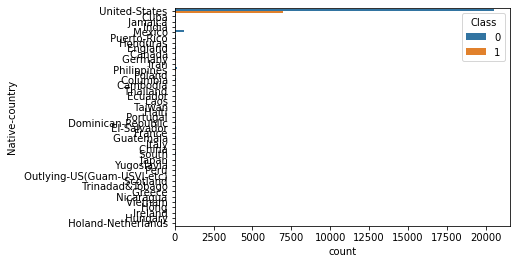

In [ ]:
sns.countplot(y='Native-country', hue='Class', data = cat_attributes)
#Going to have to group into regions

#####Our categorical data suggests that correlations exist between classes and our features. For example, we see that being self-employed or going to professional school give you a high chance of earning over $50K. 

##### We note here that we want to encode these categories into numerical data before fitting our models.

We will now set up our **pipeline**

In [ ]:
# So that our classifiers work properly:
# 1) Our numerical values must be scaled
# 2) Our cateogircal values must be converted into numerical values 
# We will write custom pipelines so we can manipulate the dataframes more easily

# Column Selector Pipeline:
# Works for both numerical and categorical
class ColumnsSelector(BaseEstimator, TransformerMixin):
  def __init__(self, type):
    self.type = type
  def fit(self, X, y=None):
    return self
  def transform(self,X):
    return X.select_dtypes(include=[self.type])

# Numerical Pipeline:
# We select numerical columns using the column selector pipeline
# We scale them values using sklearn's Standard Scalar
num_pipeline = Pipeline(steps=[
    ("num_attr_selector", ColumnsSelector(type='int')),
    ("scaler", StandardScaler())
])


# Categorical Pipeline (two parts):

# 1) Categorical Encoder
# We encode categorical variables to numerical ones (category codes) using pd.getdummies
# We must merge temporary the train and test data-set for this just in case there are categories in one that are not in the other
class CategoricalEncoder(BaseEstimator, TransformerMixin):
  def __init__(self, dropFirst=True):
    self.categories=dict()
    self.dropFirst=dropFirst
  def fit(self, X, y=None):
    join_df = pd.concat([train_data, test_X])
    join_df = join_df.select_dtypes(include=['object'])
    for column in join_df.columns:
      self.categories[column] = join_df[column].value_counts().index.tolist()
    return self
  def transform(self, X):
    X_copy = X.copy()
    X_copy = X_copy.select_dtypes(include=['object'])
    for column in X_copy.columns:
      X_copy[column] = X_copy[column].astype({column:
                CategoricalDtype(self.categories[column])})
    return pd.get_dummies(X_copy, drop_first=self.dropFirst)

# 2) Pipeline for cateogrical columns:
cat_pipeline = Pipeline(steps=[
    ("cat_attr_selector", ColumnsSelector(type='object')),
    ("encoder", CategoricalEncoder(dropFirst=True))
])

# Full Pipeline:
# This allows us to input the whole data-set to it
full_pipeline = FeatureUnion([("num_pipe", num_pipeline), 
                ("cat_pipeline", cat_pipeline)])

In [ ]:
# We complete the data processing step by applying the pipeline to the data

train_X = train_data.drop('Class', axis =1)
train_Y = train_data['Class']

test_X = test_data.drop('Class', axis = 1)
test_Y = test_data['Class']

train_X_processed = full_pipeline.fit_transform(train_X)
test_X_processed = full_pipeline.fit_transform(test_X)


#Models

**Baseline: Dummy Classifier**

In [ ]:
# As a baseline, we fit the dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(train_X_processed, train_Y)
test_Y_predicted = dummy_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)

0.7543160690571049

**Decision Tree**

In [ ]:

tree_clf = DecisionTreeClassifier()
tree_clf = tree_clf.fit(train_X_processed, train_Y)
test_Y_predicted = tree_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)


0.7926294820717131

**Naive-Bayes (Gaussian NB)**

In [ ]:

GNB_clf = GaussianNB()
GNB_clf = GNB_clf.fit(train_X_processed, train_Y)
test_Y_predicted = GNB_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)


0.5538512616201859

**Gradient Boosting**

In [ ]:

gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(train_X_processed, train_Y)
test_Y_predicted = gbc_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)


0.854714475431607

Gradient boosting performs very well on this data-set. We see accuracy of amost 86%. Given the disappointing results with the other models, we are satisfied with this result. 

# Experimenting with features
##### We have chosen Gradient Boosting as our model of choice for this data-set due to its high accuracy score. We now want to run our model with different feature combinations.

In [ ]:

# Here is a re-run with all the features included

train_data_modified = train_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]
test_data_modified = test_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]

train_X = train_data_modified.drop('Class', axis =1)
train_Y = train_data_modified['Class']
test_X = test_data_modified.drop('Class', axis = 1)
test_Y = test_data_modified['Class']
train_X_processed = full_pipeline.fit_transform(train_X)
test_X_processed = full_pipeline.fit_transform(test_X)
gbc_clf.fit(train_X_processed, train_Y)
test_Y_predicted = gbc_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)


0.854714475431607

Good accuracy score at 85.47%

We now drop features one by one and observe the loss or gain in accuracy.

In [ ]:
# Baseline 85.47%

# - Age

train_data_modified = train_data[["Workclass", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]
test_data_modified = test_data[["Workclass", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]

train_X = train_data_modified.drop('Class', axis =1)
train_Y = train_data_modified['Class']
test_X = test_data_modified.drop('Class', axis = 1)
test_Y = test_data_modified['Class']
train_X_processed = full_pipeline.fit_transform(train_X)
test_X_processed = full_pipeline.fit_transform(test_X)
gbc_clf.fit(train_X_processed, train_Y)
test_Y_predicted = gbc_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)

0.8539176626826029

We get a slightly worse classification: 85.39%

In [ ]:
# Baseline 85.47%

# - Workclass

train_data_modified = train_data[["Age", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]
test_data_modified = test_data[["Age", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]

train_X = train_data_modified.drop('Class', axis =1)
train_Y = train_data_modified['Class']
test_X = test_data_modified.drop('Class', axis = 1)
test_Y = test_data_modified['Class']
train_X_processed = full_pipeline.fit_transform(train_X)
test_X_processed = full_pipeline.fit_transform(test_X)
gbc_clf.fit(train_X_processed, train_Y)
test_Y_predicted = gbc_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)

0.8518592297476759

We remove Workclass. We observe a slightly worse accuracy score of 85.19%

In [ ]:
# Baseline 85.47%

# - Final Weight

train_data_modified = train_data[["Age", "Workclass", "Education", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]
test_data_modified = test_data[["Age", "Workclass", "Education", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]

train_X = train_data_modified.drop('Class', axis =1)
train_Y = train_data_modified['Class']
test_X = test_data_modified.drop('Class', axis = 1)
test_Y = test_data_modified['Class']
train_X_processed = full_pipeline.fit_transform(train_X)
test_X_processed = full_pipeline.fit_transform(test_X)
gbc_clf.fit(train_X_processed, train_Y)
test_Y_predicted = gbc_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)

0.8538512616201859

We remove Final Weight. We get a slightly worse accuracy score at 85.39%

In [ ]:
# Baseline 85.47%

# - Education

train_data_modified = train_data[["Age", "Workclass", "Final Weight", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]
test_data_modified = test_data[["Age", "Workclass", "Final Weight", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]

train_X = train_data_modified.drop('Class', axis =1)
train_Y = train_data_modified['Class']
test_X = test_data_modified.drop('Class', axis = 1)
test_Y = test_data_modified['Class']
train_X_processed = full_pipeline.fit_transform(train_X)
test_X_processed = full_pipeline.fit_transform(test_X)
gbc_clf.fit(train_X_processed, train_Y)
test_Y_predicted = gbc_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)

0.8539840637450199

We remove Education. We get a very slightly worse accuracy score of 85.40%

In [ ]:
# Baseline 85.47%

# - Education Number of Year

train_data_modified = train_data[["Age", "Workclass", "Final Weight", "Education", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]
test_data_modified = test_data[["Age", "Workclass", "Final Weight", "Education", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]

train_X = train_data_modified.drop('Class', axis =1)
train_Y = train_data_modified['Class']
test_X = test_data_modified.drop('Class', axis = 1)
test_Y = test_data_modified['Class']
train_X_processed = full_pipeline.fit_transform(train_X)
test_X_processed = full_pipeline.fit_transform(test_X)
gbc_clf.fit(train_X_processed, train_Y)
test_Y_predicted = gbc_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)

0.8539840637450199

We remove Education Number of Years. We get a slightly worse accuracy at 85.40%

In [ ]:
# Baseline 85.47%

# - Marital-status

train_data_modified = train_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]
test_data_modified = test_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]

train_X = train_data_modified.drop('Class', axis =1)
train_Y = train_data_modified['Class']
test_X = test_data_modified.drop('Class', axis = 1)
test_Y = test_data_modified['Class']
train_X_processed = full_pipeline.fit_transform(train_X)
test_X_processed = full_pipeline.fit_transform(test_X)
gbc_clf.fit(train_X_processed, train_Y)
test_Y_predicted = gbc_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)

0.8565073041168658

We remove marital-status and get a higher accuracy of 85.65%

In [ ]:
# Baseline 85.47%

# - Occupation

train_data_modified = train_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]
test_data_modified = test_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]

train_X = train_data_modified.drop('Class', axis =1)
train_Y = train_data_modified['Class']
test_X = test_data_modified.drop('Class', axis = 1)
test_Y = test_data_modified['Class']
train_X_processed = full_pipeline.fit_transform(train_X)
test_X_processed = full_pipeline.fit_transform(test_X)
gbc_clf.fit(train_X_processed, train_Y)
test_Y_predicted = gbc_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)

0.85

We remove Occupation and get a slightly worse classification at 85%

In [ ]:
# Baseline 85.47%

# - Relationship

train_data_modified = train_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Occupation", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]
test_data_modified = test_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Occupation", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]

train_X = train_data_modified.drop('Class', axis =1)
train_Y = train_data_modified['Class']
test_X = test_data_modified.drop('Class', axis = 1)
test_Y = test_data_modified['Class']
train_X_processed = full_pipeline.fit_transform(train_X)
test_X_processed = full_pipeline.fit_transform(test_X)
gbc_clf.fit(train_X_processed, train_Y)
test_Y_predicted = gbc_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)

0.8518592297476759

We remove Relationship and get a slightly worse accuracy at 85.19%

In [ ]:
# Baseline 85.47%

# - Race

train_data_modified = train_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]
test_data_modified = test_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]

train_X = train_data_modified.drop('Class', axis =1)
train_Y = train_data_modified['Class']
test_X = test_data_modified.drop('Class', axis = 1)
test_Y = test_data_modified['Class']
train_X_processed = full_pipeline.fit_transform(train_X)
test_X_processed = full_pipeline.fit_transform(test_X)
gbc_clf.fit(train_X_processed, train_Y)
test_Y_predicted = gbc_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)

0.854714475431607

We remove Race and we get the same accuracy score of 85.47%.

In [ ]:
# Baseline 85.47%

# - Sex

train_data_modified = train_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Race", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]
test_data_modified = test_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Race", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]

train_X = train_data_modified.drop('Class', axis =1)
train_Y = train_data_modified['Class']
test_X = test_data_modified.drop('Class', axis = 1)
test_Y = test_data_modified['Class']
train_X_processed = full_pipeline.fit_transform(train_X)
test_X_processed = full_pipeline.fit_transform(test_X)
gbc_clf.fit(train_X_processed, train_Y)
test_Y_predicted = gbc_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)

0.8555776892430279

We remove Sex and get a higher classification accuracy at 85.56%. 

In [ ]:
# Baseline 85.47%

# - Capital Gain

train_data_modified = train_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]
test_data_modified = test_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]

train_X = train_data_modified.drop('Class', axis =1)
train_Y = train_data_modified['Class']
test_X = test_data_modified.drop('Class', axis = 1)
test_Y = test_data_modified['Class']
train_X_processed = full_pipeline.fit_transform(train_X)
test_X_processed = full_pipeline.fit_transform(test_X)
gbc_clf.fit(train_X_processed, train_Y)
test_Y_predicted = gbc_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)

0.8434262948207172

Removing Capital Gain leads to worse classification of 84.34%

In [ ]:
# Baseline 85.47%

# - Capital Loss

train_data_modified = train_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Hours-per-week", "Native-country", "Class"]]
test_data_modified = test_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Hours-per-week", "Native-country", "Class"]]

train_X = train_data_modified.drop('Class', axis =1)
train_Y = train_data_modified['Class']
test_X = test_data_modified.drop('Class', axis = 1)
test_Y = test_data_modified['Class']
train_X_processed = full_pipeline.fit_transform(train_X)
test_X_processed = full_pipeline.fit_transform(test_X)
gbc_clf.fit(train_X_processed, train_Y)
test_Y_predicted = gbc_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)

0.847543160690571

Removing Capital Loss leads to a worse classification of 84.75%

In [ ]:
# Baseline 85.47%

# - Hours-per-week

train_data_modified = train_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Native-country", "Class"]]
test_data_modified = test_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Native-country", "Class"]]

train_X = train_data_modified.drop('Class', axis =1)
train_Y = train_data_modified['Class']
test_X = test_data_modified.drop('Class', axis = 1)
test_Y = test_data_modified['Class']
train_X_processed = full_pipeline.fit_transform(train_X)
test_X_processed = full_pipeline.fit_transform(test_X)
gbc_clf.fit(train_X_processed, train_Y)
test_Y_predicted = gbc_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)

0.8541168658698539

We remove Hours-per-week and get a worse classification at 85.41%

In [ ]:
# Baseline 85.47%

# - Native Country

train_data_modified = train_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Class"]]
test_data_modified = test_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Class"]]

train_X = train_data_modified.drop('Class', axis =1)
train_Y = train_data_modified['Class']
test_X = test_data_modified.drop('Class', axis = 1)
test_Y = test_data_modified['Class']
train_X_processed = full_pipeline.fit_transform(train_X)
test_X_processed = full_pipeline.fit_transform(test_X)
gbc_clf.fit(train_X_processed, train_Y)
test_Y_predicted = gbc_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)

0.8545152722443559

We remove Native Country and get a slightly worse classification of 85.45%

That was all 14 features. We compile this data and analyze it in the report. We run additional tests on pairs of features we suspect to be very related (ex. Education and Education Number of Years).

In [ ]:
# Baseline 85.47%

# - Education, Education Number of Year

train_data_modified = train_data[["Age", "Workclass", "Final Weight", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]
test_data_modified = test_data[["Age", "Workclass", "Final Weight", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]

train_X = train_data_modified.drop('Class', axis =1)
train_Y = train_data_modified['Class']
test_X = test_data_modified.drop('Class', axis = 1)
test_Y = test_data_modified['Class']
train_X_processed = full_pipeline.fit_transform(train_X)
test_X_processed = full_pipeline.fit_transform(test_X)
gbc_clf.fit(train_X_processed, train_Y)
test_Y_predicted = gbc_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)

0.8480743691899071

Worse classification of 84.81%

In [ ]:
# Baseline 85.47%

# - Marital-status, Relationship

train_data_modified = train_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Occupation", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]
test_data_modified = test_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Occupation", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]

train_X = train_data_modified.drop('Class', axis =1)
train_Y = train_data_modified['Class']
test_X = test_data_modified.drop('Class', axis = 1)
test_Y = test_data_modified['Class']
train_X_processed = full_pipeline.fit_transform(train_X)
test_X_processed = full_pipeline.fit_transform(test_X)
gbc_clf.fit(train_X_processed, train_Y)
test_Y_predicted = gbc_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)

0.8282868525896414

We remove marital-status and relationship and get a much worse classification at 82.83%

In [ ]:
# Baseline 85.47%

# - Occupation, Workclass

train_data_modified = train_data[["Age", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]
test_data_modified = test_data[["Age", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]

train_X = train_data_modified.drop('Class', axis =1)
train_Y = train_data_modified['Class']
test_X = test_data_modified.drop('Class', axis = 1)
test_Y = test_data_modified['Class']
train_X_processed = full_pipeline.fit_transform(train_X)
test_X_processed = full_pipeline.fit_transform(test_X)
gbc_clf.fit(train_X_processed, train_Y)
test_Y_predicted = gbc_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)

0.8490703851261621

Removing both Workclass and Occupation yield an accuracy score of 84.9%

In [ ]:
# Baseline 85.47%

# - Capital Gain, Capital Loss

train_data_modified = train_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Hours-per-week", "Native-country", "Class"]]
test_data_modified = test_data[["Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Hours-per-week", "Native-country", "Class"]]

train_X = train_data_modified.drop('Class', axis =1)
train_Y = train_data_modified['Class']
test_X = test_data_modified.drop('Class', axis = 1)
test_Y = test_data_modified['Class']
train_X_processed = full_pipeline.fit_transform(train_X)
test_X_processed = full_pipeline.fit_transform(test_X)
gbc_clf.fit(train_X_processed, train_Y)
test_Y_predicted = gbc_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)

0.8374501992031872

Much worse accuracy after removing both Capital gain and capital loss of 83.75%

The experiment is complete now. We try to finalize our model by dropping the features which raised or had the same accuracy when dropped earlier. These were three: Marital-status, Race, and Sex. Do we drop all 3, two of them, or just one?

In [ ]:
# Baseline 85.47%

# - Marital-status or Race or Sex, or any pair, or all three

train_data_modified = train_data[["Race", "Sex", "Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Occupation", "Relationship", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]
test_data_modified = test_data[["Race", "Sex", "Age", "Workclass", "Final Weight", "Education", "Education Number of Year", "Occupation", "Relationship", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Class"]]

train_X = train_data_modified.drop('Class', axis =1)
train_Y = train_data_modified['Class']
test_X = test_data_modified.drop('Class', axis = 1)
test_Y = test_data_modified['Class']
train_X_processed = full_pipeline.fit_transform(train_X)
test_X_processed = full_pipeline.fit_transform(test_X)
gbc_clf.fit(train_X_processed, train_Y)
test_Y_predicted = gbc_clf.predict(test_X_processed)
accuracy_score(test_Y_predicted, test_Y)

0.8565073041168658

##### Baseline: 85.47%
#####Only Marital-status: 85.65%
#####Only Race: 85.47%
#####Only Sex: 85.56%
#####Marital-status and race:  85.64%
#####Marital-status and sex: 85.50
#####Race and sex: 85.56%
#####All 3: 85.55%
#####All of these yield a better result than the baseline, but the greatest gain in accuracy comes from removing only marital-status so we will move forward with only that.

#References:
#####Agarwal, A. “Logistic Regression Classifier on Census Income Data.” Medium, TowardsData Science,  22  Oct.  2018,  towardsdatascience.com/logistic-regression-classifier-on-census-income-data-e1dbef0b5738.
#####Brownlee,  J.  “Imbalanced  Classification  with  the  Adult  Income  Dataset.”  MachineLearning Mastery, 6 Mar. 2020, machinelearningmastery.com/imbalanced-classification-with-the-adult-income-dataset.
#####Dua, D. and Graff, C. 2019.  UCI Machine Learning Repository.  Irvine, CA: Universityof California, School of Information and Computer Science.
#####Hamers, B. and Suykens, J. and Moor, B. ”Coupled Transductive Ensemble Learningof Kernel Models.” Journal of Machine Learning Research, vol.  1, no.  10, 2003, pp.1-48.
#####Kohavi, R. Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid.In KDD-96 Proceedings, 1996.
#####Wang, K. and Zhou, S. and Ada Fu, C. and Xu Yu, J. ”Mining Changes of Classificationby Correspondence Tracing.” In Third SIAM International Conference on Data MiningProceedings, 2003.10
